<a href="https://colab.research.google.com/github/eugenelim17/eugenelim17.github.io/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction:** The team members, Eugene Lim and Tyler Simms, will be using a dataset on 2023 LinkedIn Job Post Listings over a two day period during the year to identify trends within the current US job market, specifically for remote occupations and non-remote occupations. Our working project title is "Trends, Patterns, and Directions in the 2023 U.S. job market". We will be working with this dataset because it provides great detail, and several datas we could use such as the type of job, pay period, salary, company IDs, and whether remote work is allowed or not.

Link to dataset: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings

Link to GitHub repo: https://github.com/eugenelim17/eugenelim17.github.io/tree/main

Link to Trello Board: https://trello.com/b/nKeaOhI6/data-science-job-market-project

**Collaboration Plan:** We plan to meet once a week through Zoom in order to work on the project. Alternative ways that we will use to communicate will be via text message, and also on a Trello dashboard where we will be uploading any important updates, questions, and idea proposals that we may have. We have also created a Github repo that is shared with each other in order to organize, update and maintain our code in order with each other. We will be collaborating on the code in our notebook file through Google Colab.

In [72]:
from google.colab import files
uploaded = files.upload()

Saving job_postings.csv to job_postings (3).csv


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_file_path = '/content/job_postings.csv'
job_postings_df = pd.read_csv(csv_file_path)


**Project Plan:** As mentioned above, our dataset includes a high volune of observations on individual LinkedIn job post listings that appeaared on the LinkedIn website over a two day period in 2023. Our team has chosen this dataset because the dataset is quite robust and the creater did significant due dilligence in gathering the data for each observation. Our first question we hope to answer is the how the relationship appears between jobs that are in person and remote. The dataset contains a variable that already categorizes each job as in person or remote. Through filtering on this variable, we can find material and interesting differences based on relevant variables. Our second question, or really set of questions, includes those such as "What industries have the highest and lowest salaries and benefits?", "What are most lucrative individual job titles regardless of industry?", and "Which geographic job locations, states and cities, have the highest and lowest salaries and benefits?"

In [ ]:
job_postings_df.dtypes

job_id                          int64
company_id                    float64
title                          object
description                    object
max_salary                    float64
med_salary                    float64
min_salary                    float64
pay_period                     object
formatted_work_type            object
location                       object
applies                       float64
original_listed_time          float64
remote_allowed                float64
views                         float64
job_posting_url                object
application_url                object
application_type               object
expiry                        float64
closed_time                   float64
formatted_experience_level     object
skills_desc                    object
listed_time                   float64
posting_domain                 object
sponsored                       int64
work_type                      object
currency                       object
compensation

In [73]:
job_postings_df.job_id = job_postings_df.job_id.astype(str)
job_postings_df.company_id = job_postings_df.company_id.astype(str)

In [75]:
job_postings_df.dtypes

job_id                          int64
company_id                    float64
title                          object
description                    object
max_salary                    float64
med_salary                    float64
min_salary                    float64
pay_period                     object
formatted_work_type            object
location                       object
applies                       float64
original_listed_time          float64
remote_allowed                float64
views                         float64
job_posting_url                object
application_url                object
application_type               object
expiry                        float64
closed_time                   float64
formatted_experience_level     object
skills_desc                    object
listed_time                   float64
posting_domain                 object
sponsored                       int64
work_type                      object
currency                       object
compensation

Listed above are the variables we will be using, and their dataypes.

In [78]:
job_postings_df = job_postings_df[job_postings_df['compensation_type'].notna()]
#Rows that do not have a compensation type are removed here using .notna()
job_postings_df['med_salary'].replace('', np.nan, inplace=True)
job_postings_df = job_postings_df.dropna(subset=['med_salary'])

Our first step of the coding portion of the project was to ensure that all the job post observations we were using had a compensation value included. When looking at the dataset, we have noticed that there were many job postings that did not include a compensation value. So, in order to get rid of these rows without a compensation type, we've added a .na() function. This is also done with med_salary, for the same reason of eliminating any rows of data without a median salary provided.

In [79]:
#Any salary that is based off of an hourly basis is adjusted to a yearly salary, by multiplying by 40 since that is the American national standard for weekly hours worked.
job_postings_df['max_salary'] = job_postings_df.apply(lambda row: row['max_salary'] * 40 * 52 if row['pay_period'] == 'Hourly' else row['max_salary'], axis=1)
job_postings_df['med_salary'] = job_postings_df.apply(lambda row: row['med_salary'] * 40 * 52 if row['pay_period'] == 'Hourly' else row['med_salary'], axis=1)
job_postings_df['min_salary'] = job_postings_df.apply(lambda row: row['min_salary'] * 40 * 52 if row['pay_period'] == 'Hourly' else row['min_salary'], axis=1)
job_postings_df['pay_period'] = 'Yearly'  # Update the pay period to 'Yearly'

After removing the rows with no compensation type, we see that there are two types of compensation wages left: hourly, and yearly. It is much more organized to keep just one unit for the salary, so we used yearly. This is done by multiplying any salary that has an hourly wage by 40 since that is the American standard of hours worked per week, and then multiplied by 52 since there are 52 weeks in a year.

In [80]:
#Fill non-remote workers with a value of 0
job_postings_df['remote_allowed'] = job_postings_df['remote_allowed'].fillna(0)

#Calculate summary statistics for remote and non-remote workers based on yearly median salary
remote_workers = job_postings_df[job_postings_df['remote_allowed'] == 1]
non_remote_workers = job_postings_df[job_postings_df['remote_allowed'] == 0]

From the dataframe, we see that remote workers are labelled '1' if they are remote in the 'remote_allowed' variable, but if they are in person then they do not have a variable. We labelled these in-person workers as '0' by simply using the .fillna(0) function.

In [81]:
# Summary statistics for remote workers
summary_remote = remote_workers['med_salary'].describe()

# Summary statistics for non-remote workers
summary_non_remote = non_remote_workers['med_salary'].describe()

# Print the summary statistics
print("Summary Statistics for Remote Workers:")
print(summary_remote)

print("\nSummary Statistics for Non-Remote Workers:")
print(summary_non_remote)

Summary Statistics for Remote Workers:
count       117.000000
mean      93813.643077
std      161219.557211
min          10.000000
25%          22.000000
50%       42000.000000
75%      150000.000000
max      800000.000000
Name: med_salary, dtype: float64

Summary Statistics for Non-Remote Workers:
count       864.000000
mean      34038.521458
std       77755.120407
min          10.000000
25%          18.000000
50%          24.650000
75%       45211.750000
max      998426.000000
Name: med_salary, dtype: float64


When comparing the two types of workers by their summary statistics, we can see that the remote workers have a significantly higher average median salary (93,813.64 USD) compared to non-remote workers (34,038.52 USD). Both categories also have relatively high standard deviations, which indicates a wide of variation in salaries, but remote workers have a higher standard deviation. We can already predict both will be skewed right in a graph, since the means for both types of workers are greater than their medians, which are seen from the 50th percentile.

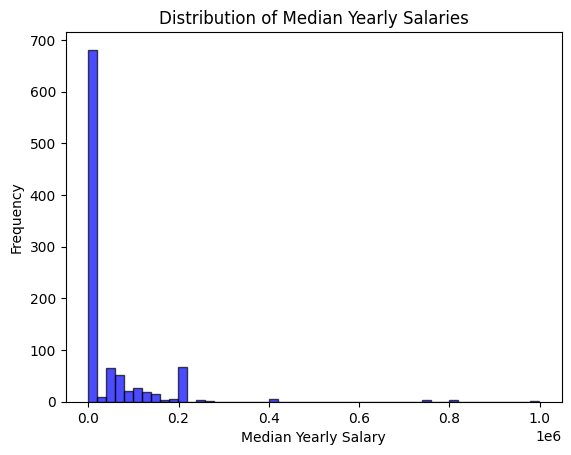

In [82]:
job_postings_df['med_salary'].plot.hist(bins=50, color='blue', alpha=0.7, edgecolor='black', title='Distribution of Median Yearly Salaries')
plt.xlabel('Median Yearly Salary')
plt.ylabel('Frequency')
plt.show()

Attached above is a histogram which shows the distribution of median yearly salaries. It is orginally skewed heavily to the right, and this is because a vast majority of salaries are less than the 100,000 range, with far outliers reaching $1 million.

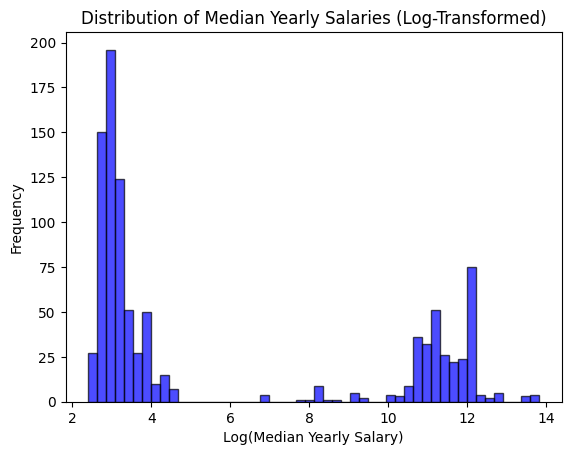

In [83]:
job_postings_df['med_salary'] = np.log1p(job_postings_df['med_salary'])
job_postings_df['med_salary'].plot.hist(bins=50, color='blue', alpha=0.7, edgecolor='black', title='Distribution of Median Yearly Salaries (Log-Transformed)')

# Set labels and title
plt.xlabel('Log(Median Yearly Salary)')
plt.ylabel('Frequency')
plt.show()

To fix the skew we have applied a logarithmic transformation, specifically by taking in the logarithmic value each of the median salaries, which fixes the skew much better makes the histogram look much more symmetrical.

In [84]:
job_postings_df = job_postings_df.dropna(subset=['compensation_type', 'med_salary'])
job_postings_df.title.value_counts().head(200).to_frame()

,title
Sales Director [Owner/Operator],57
Search Engine Analyst,17
Assistant Store Manager (ASM),12
Investment Analyst,11
Package Handler (Warehouse like),9
...,...
Guest Services Assistant/Health Screener; 0.5 FTE; Day Shift,1
Delivery Driver,1
Route Operations Supervisor,1
Hourly Restaurant Manager,1


In [85]:
# Define the mapping from job titles to industries
job_title_to_industry_mapping = {
    "Warehouse Order Selector": "Warehouse",
    "Package Handler (Warehouse like)": "Warehouse",
    "Warehouse Associate": "Warehouse",
    "Warehouse Worker - SAS Safety Corp.": "Warehouse",
    "Equipment Technician": "Technician",
    "Field Service Technician": "Technician",
    "Pest Control Technician": "Technician",
    "Central Services Technician": "Technician"
}

# Use the .replace() method to create the 'industries' column
job_postings_df['industries'] = job_postings_df['title'].replace(job_title_to_industry_mapping)

Here a map called 'Industries' is created, where eight occupations are organized into a dictionary based on what type of job they are, and the two types in this example are 'Warehouse' and 'Technician'.

In [86]:
selected_industries = ["Warehouse", "Technician"]
filtered_df = job_postings_df[job_postings_df['industries'].isin(selected_industries)].copy()

# Converted the logarithmic values back to their actual yearly salaries using np.exp
filtered_df['med_salary'] = np.exp(filtered_df['med_salary'])

# Summary statistics for "med_salary" for each industry
summary_statistics = filtered_df.groupby('industries')['med_salary'].describe()

# Print the summary statistics
print(summary_statistics)


            count          mean           std   min   25%     50%         75%  \
industries                                                                      
Technician   11.0  21378.498182  31361.651154  21.0  21.5  25.000  42501.0000   
Warehouse    16.0   8391.797500  23525.187817  16.0  17.0  19.625     20.9325   

                max  
industries           
Technician  75001.0  
Warehouse   82001.0  


We create the summary statistics between technicians and warehouse workers, and the first thing to do is to revert the salaries back to their original values from the logarithmic values, by using the np.exp() function. As seen from the summary statistic, we can see the "Technician" industry generally offers higher median salaries, with an average around 21,378 USD, but with significant variation, which is evidenced by the high standard deviation. The "Warehouse" industry has a lower average median salary of around 8,391 USD, and has a lower, but still considerable variation in salary. In both industries, there is a wide range of median salaries, with the maximum salaries being significantly higher than the average. This suggests that some job postings within these industries offer very high salaries, while others offer lower salaries.